<a href="https://colab.research.google.com/github/afit-csce623-master/demos/blob/main/demo_scaling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# This tutorial developed by W. Blair Watkinson II
# Apr 30, 2021

# Developed in support of education and research activities at 
# the Air Force Institute of Technology and the CSCE 623
# Machine Learning course

# For changes or questions, contact warren.watkinson@afit.edu

# MIT License

# Copyright (c) 2021 W. Blair Watkinson II

# Permission is hereby granted, free of charge, to any person obtaining a copy
# of this software and associated documentation files (the "Software"), to deal
# in the Software without restriction, including without limitation the rights
# to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
# copies of the Software, and to permit persons to whom the Software is
# furnished to do so, subject to the following conditions:

# The above copyright notice and this permission notice shall be included in all
# copies or substantial portions of the Software.

# THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
# IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
# FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
# AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
# LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
# OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
# SOFTWARE.

# Data Scaling and Transformation

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import Markdown as md
from IPython.display import Markdown as md
from IPython.display import display, Math, Latex

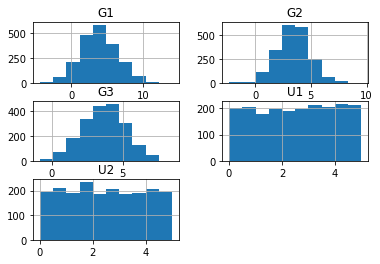

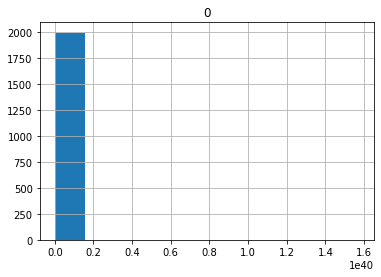

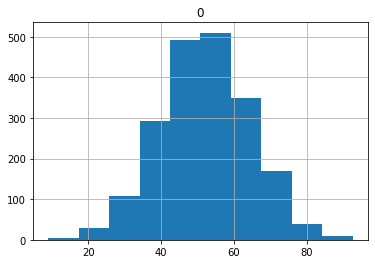

In [45]:
def generate_data(random_state, n_samples, 
                  n_gaussian_features, g_feature_mean_range, g_feature_sd_range,
                  n_uniform_features, u_feature_range,
                  n_categorial_features):

    coefficient_range = [0, 5]

    X = pd.DataFrame()

    # generate gaussian features
    for idx in range(n_gaussian_features):
        X[f'G{idx+1}'] = random_state.normal(
            loc = random_state.uniform(*g_feature_mean_range), 
            scale = random_state.uniform(*g_feature_sd_range), 
            size = n_samples)


    # generate uniform features
    for idx in range(n_uniform_features):
        X[f'U{idx+1}'] = random_state.uniform(*u_feature_range, n_samples)

    # generate categorical features
    for idx in range(n_category_features):
        X[f'C{idx+1}'] = random_state.choice(('a', 'b'), n_samples)

    y = pd.DataFrame()
    y[0] = np.zeros(n_samples)

    coef = np.zeros(n_gaussian_features + n_category_features + n_uniform_features)
    for idx, column in enumerate(X.columns):
        coef[idx] = random_state.uniform(*coefficient_range)
        if column[0] == 'G' or column[0] == 'U':
            y[0] += X[column] * coef[idx]
        elif column[0] == 'C':
            y[0] += (X[column] == 'a') * coef[idx]

    intercept = random_state.uniform(g_feature_mean_range[1])

    y[0] = np.e ** y[0]

    return X, y, coef, intercept


random_state = np.random.RandomState(623)

n_samples = 2000
n_gaussian_features = 3
n_uniform_features = 2
n_category_features = 2
g_feature_mean_range = [1, 5]
g_feature_sd_range = [1, 3]
u_feature_range = [0,5]

X, y, coef, intercept = generate_data(random_state, 
                                      n_samples, 
                                      n_gaussian_features, g_feature_mean_range, g_feature_sd_range, 
                                      n_uniform_features, u_feature_range,
                                      n_category_features)

In our data analysis, we note that both the `X` features and `y` targets have a relatively gaussian distribution. Many machine learning tasks require input data to have the same relative scale. Common scaling and normalization tools include:

- Data normalization rescales all data from its original range to $[0, 1]$:

  $x_i' = \frac{(x_i - x_{min})}{(x_{max} - x_{min})}$

  where $x$ represents one of the features, and $x_i$ is the $i^{th}$ observation of feature $x$. $x_{min}$ and $x_{max}$ are the minimum and maximum observations of feature $x$. $x_i'$ is the new feature value within the range $[0, 1]$. The `scikit-learn` package provides a utility for scaling all feature values with the [MinMaxScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html#sklearn.preprocessing.MinMaxScaler) and a slight variation, the [MaxAbsScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MaxAbsScaler.html#sklearn.preprocessing.MaxAbsScaler). These techniques preserve the original distribution of the data and may be suitable for sparse data. One drawback of normalization is that extreme outliers will cause data to be squished toward one ond of the scale or another during normalization.

- Data standardization, also known as Z-score, is a scaling technique that ensures that all data have a mean of zero and unit variance:

  $x_i' = \frac{x_i - \mu_x}{\sigma_x}$

 where $\mu_x$ is the mean of $x$ and $\sigma_x$ is the standard deviation of $x$. The new feature value $x_i'$ represents a feature value such that all $x'$ have a zero mean and a standard deviation of 1. The [StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler) of the `scikit-learn` library provides this functionality. This technique is suitable for data that already have a normal distribution.

- Other methods of scaling and transforming data are common, including clipping, which clips all values that exceed a fixed value. Log scaling is useful when data are not well distributed over the range with a high frequency of lower values with a long tail. Log scaling produces the power law distribution and can generate a more uniform distribution for data with a long tail. Both of these scaling methods are beyond the scope of this tutorial, but you can read more about them at [Google's Machine Learning Data Prep course](https://developers.google.com/machine-learning/data-prep/transform/normalization). Both clipping and log scaling can be followed with either normalization or standardization.

Noting that our data has a normal distribution, we will standardize our data using the Z-score approach and the `scikit-learn` `StandardScaler` function.

In [4]:
import numpy as np
import pandas as pd
from IPython.display import Markdown as md

random_state = np.random.RandomState(623)

# instructor provided code
plot_x_min = -2.
plot_x_max = 2.

def generate_data(random_state, quantity = 200):


    np.random.seed(seed)
    x = np.random.uniform(low=plot_x_min,high=plot_x_max,size=quantity)
    order = np.random.randint(2, 3)
    betas = np.random.uniform(-2, 2, order)

    y = sum((beta * x ** (idx+1) for idx, beta in enumerate(betas)))

    beta0 = np.random.uniform(np.min(y), np.max(y))

    noise = np.random.normal(size=quantity, scale = (np.max(y) - np.min(y)) / 8)
    if test_data: # get new sample if we're generating test data
        noise = np.random.normal(size=quantity, scale = (np.max(y) - np.min(y)) / 8)

    y += noise + beta0

    df = pd.DataFrame({'x': x, 'y': y})

    globals()['global_betas'] = betas
    globals()['global_beta0'] = beta0

    return(df)



In [5]:
from sklearn.preprocessing import StandardScaler

# scaler_X = StandardScaler()
# scaler_y = StandardScaler()

# # fit and transform in one step
# X_train_normalized = scaler_X.fit_transform(X_train)
# # y_train_normalized = scaler_y.fit_transform(y_train.reshape(1, -1))
# y_train_normalized = np.squeeze(scaler_y.fit_transform(np.expand_dims(y_train, axis=1)))